## Logistic Regression

In [1]:
# Import the libraries we need for this lab
from torch import nn
import torch
import matplotlib.pyplot as plt

In [2]:
# Set the random seed
torch.manual_seed(2)

## Logistic Function

In [3]:
# Create a tensor ranging from -100 to 100
z = torch.arange(-100, 100, 0.1).view(-1, 1)
print("The tensor: ", z)

The tensor:  tensor([[-100.0000],
        [ -99.9000],
        [ -99.8000],
        ...,
        [  99.7000],
        [  99.8000],
        [  99.9000]])


In [4]:
# Create a sigmoid object
sig = nn.Sigmoid()

In [5]:
# Use sigmoid object to calculate the
yhat = sig(z)

Text(0, 0.5, 'yhat')

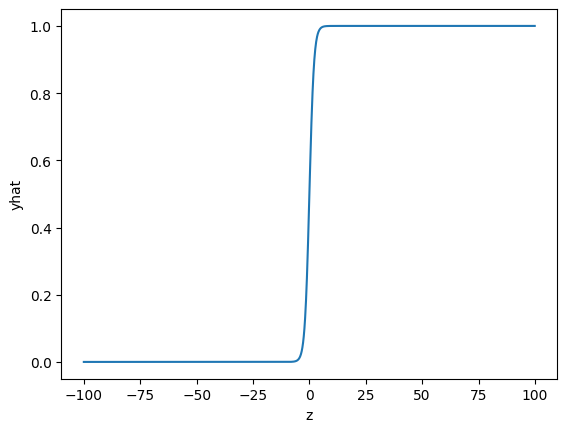

In [6]:
# Plot the results
plt.plot(z.numpy(), yhat.numpy())
plt.xlabel('z')
plt.ylabel('yhat')

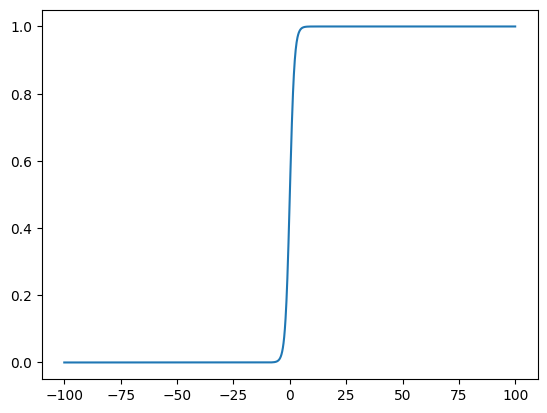

In [7]:
# Apply the element-wise Sigmoid from the function module and plot the results
yhat = torch.sigmoid(z)
plt.plot(z.numpy(), yhat.numpy())

## Build a Logistic Regression with nn.Sequential

In [8]:
# Create x and X tensor
x = torch.tensor([[1.0]])
X = torch.tensor([[1.0], [100]])
print("x: ", x)
print("x Shape: ", x.shape)
print("x Size: ", x.size())
print("x Dimension: ", x.ndim)
print("X: ", X)
print("X Shape: ", X.shape)
print("X Size: ", X.size())
print("X Dimension: ", X.ndim)

x:  tensor([[1.]])
x Shape:  torch.Size([1, 1])
x Size:  torch.Size([1, 1])
x Dimension:  2
X:  tensor([[  1.],
        [100.]])
X Shape:  torch.Size([2, 1])
X Size:  torch.Size([2, 1])
X Dimension:  2


In [9]:
# Use sequential function to create model
model = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid())

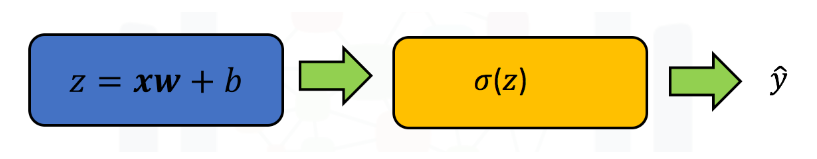

In [10]:
# Print the parameters
print("Model Parameters: ", list(model.parameters()))
print("Model Parameters: ", model.state_dict())

Model Parameters:  [Parameter containing:
tensor([[0.2294]], requires_grad=True), Parameter containing:
tensor([-0.2380], requires_grad=True)]
Model Parameters:  OrderedDict([('0.weight', tensor([[0.2294]])), ('0.bias', tensor([-0.2380]))])


In [11]:
# The prediction for x
yhat = model(x)
print("The Prediction: ", yhat)

The Prediction:  tensor([[0.4979]], grad_fn=<SigmoidBackward0>)


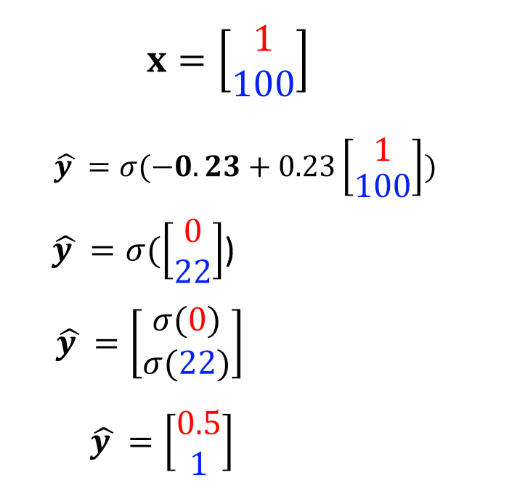

In [12]:
# The prediction for X
yhat = model(X)
print("The Prediction: ", yhat)

The Prediction:  tensor([[0.4979],
        [1.0000]], grad_fn=<SigmoidBackward0>)


In [13]:
# Create and print samples
x = torch.tensor([[1.0, 1.0]]) # 1 row (1 sample), 1 column (1 feature)
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])
print("x: ", x)
print("x Shape: ", x.shape)
print("x Size: ", x.size())
print("x Dimension: ", x.ndim)
print("X: ", X)
print("X Shape: ", X.shape)
print("X Size: ", X.size())
print("X Dimension: ", X.ndim)

x:  tensor([[1., 1.]])
x Shape:  torch.Size([1, 2])
x Size:  torch.Size([1, 2])
x Dimension:  2
X:  tensor([[1., 1.],
        [1., 2.],
        [1., 3.]])
X Shape:  torch.Size([3, 2])
X Size:  torch.Size([3, 2])
X Dimension:  2


In [14]:
# Create new model using nn.sequential()
model = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())

In [15]:
# Print the parameters
print("Model Parameters: ", list(model.parameters()))
print("Model Parameters: ", model.state_dict())

Model Parameters:  [Parameter containing:
tensor([[ 0.1939, -0.0361]], requires_grad=True), Parameter containing:
tensor([0.3021], requires_grad=True)]
Model Parameters:  OrderedDict([('0.weight', tensor([[ 0.1939, -0.0361]])), ('0.bias', tensor([0.3021]))])


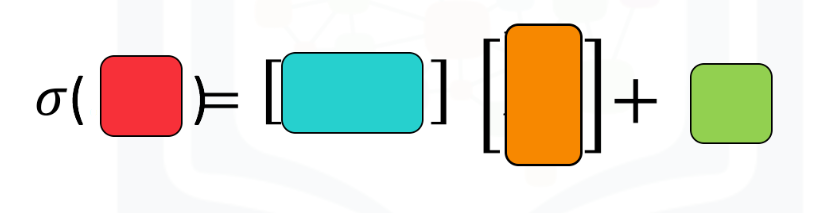

In [16]:
# Make the prediction of x
yhat = model(x)
print("The Prediction: ", yhat)

The Prediction:  tensor([[0.6130]], grad_fn=<SigmoidBackward0>)


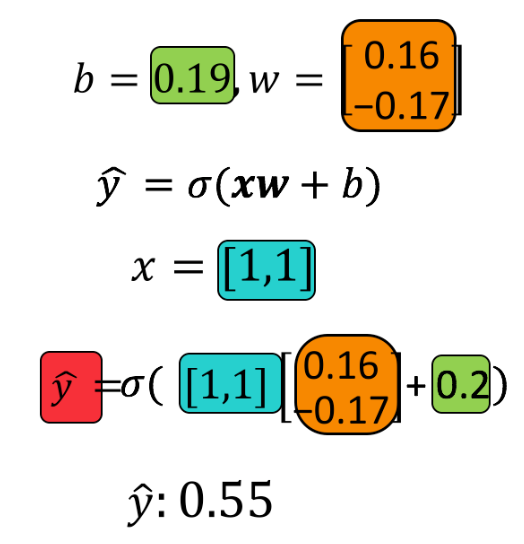

In [17]:
# The prediction of X
yhat = model(X)
print("The Prediction: ", yhat)

The Prediction:  tensor([[0.6130],
        [0.6044],
        [0.5957]], grad_fn=<SigmoidBackward0>)


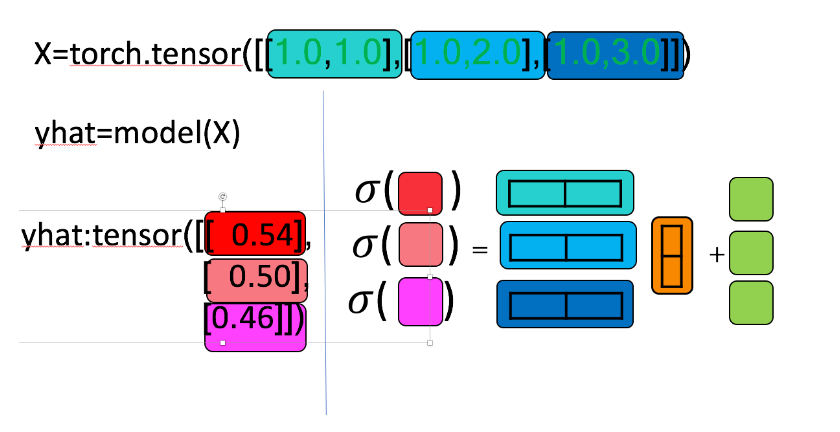

## Build Custom Modules

In [18]:
# Create logistic_regression custom class
class logistic_regression(nn.Module):

  # Constructor
  def __init__(self, n_inputs):
    super(logistic_regression, self).__init__()
    self.linear = nn.Linear(n_inputs, 1)

  # Prediction
  def forward(self, x):
    yhat = torch.sigmoid(self.linear(x))
    return yhat

In [19]:
# Create x and X tensor
x = torch.tensor([[1.0]])
X = torch.tensor([[-100], [0], [100.0]])

print("x: ", x)
print("x Shape: ", x.shape)
print("x Size: ", x.size())
print("x Dimension: ", x.ndim)
print("X: ", X)
print("X Shape: ", X.shape)
print("X Size: ", X.size())
print("X Dimension: ", X.ndim)

x:  tensor([[1.]])
x Shape:  torch.Size([1, 1])
x Size:  torch.Size([1, 1])
x Dimension:  2
X:  tensor([[-100.],
        [   0.],
        [ 100.]])
X Shape:  torch.Size([3, 1])
X Size:  torch.Size([3, 1])
X Dimension:  2


In [20]:
# Create logistic regression model
model = logistic_regression(1)

In [21]:
# Print the parameters
print("Model Parameters: ", list(model.parameters()))
print("Model Parameters: ", model.state_dict())

Model Parameters:  [Parameter containing:
tensor([[0.2381]], requires_grad=True), Parameter containing:
tensor([-0.1149], requires_grad=True)]
Model Parameters:  OrderedDict([('linear.weight', tensor([[0.2381]])), ('linear.bias', tensor([-0.1149]))])


In [22]:
# Make the prediction of x
yhat = model(x)
print("The Prediction: ", yhat)

The Prediction:  tensor([[0.5307]], grad_fn=<SigmoidBackward0>)


In [23]:
# Make the prediction of X
yhat = model(X)
print("The Prediction: ", X)

The Prediction:  tensor([[-100.],
        [   0.],
        [ 100.]])


In [24]:
# Create logistic regression model
model = logistic_regression(2)

In [25]:
# Create x and X tensor
x = torch.tensor([[1.0, 2.0]])
X = torch.tensor([[100, -100], [0.0, 0.0], [-100, 100]])

print("x: ", x)
print("x Shape: ", x.shape)
print("x Size: ", x.size())
print("x Dimension: ", x.ndim)
print("X: ", X)
print("X Shape: ", X.shape)
print("X Size: ", X.size())
print("X Dimension: ", X.ndim)

x:  tensor([[1., 2.]])
x Shape:  torch.Size([1, 2])
x Size:  torch.Size([1, 2])
x Dimension:  2
X:  tensor([[ 100., -100.],
        [   0.,    0.],
        [-100.,  100.]])
X Shape:  torch.Size([3, 2])
X Size:  torch.Size([3, 2])
X Dimension:  2


In [26]:
# Make the prediction of x
yhat = model(x)
print("The Prediciton: ", yhat)

The Prediciton:  tensor([[0.2943]], grad_fn=<SigmoidBackward0>)


In [27]:
# Make the prediction of X
yhat = model(X)
print("The Prediciton: ", yhat)

The Prediciton:  tensor([[7.7529e-33],
        [3.4841e-01],
        [1.0000e+00]], grad_fn=<SigmoidBackward0>)


In [28]:
class my_model(nn.Module):

  def __init__(self, input_shape):
    super(my_model, self).__init__()
    self.linear = nn.Linear(input_shape, 1)

  def forward(self, x):
    if x.ndim == 1:
      yhat = torch.sigmoid(self.linear(x.view(-1, 1)))
    else:
      yhat = torch.sigmoid(self.linear(x))
    return yhat

In [29]:
# Practice: Make your model and make the prediction
X = torch.tensor([-10.0])
model = my_model(1)
yhat = model(X)

print("The Prediction: ", yhat)

The Prediction:  tensor([[0.2231]], grad_fn=<SigmoidBackward0>)


In [30]:
class my_model(nn.Module):

  def __init__(self, input_shape):
    super(my_model, self).__init__()
    self.linear = nn.Linear(input_shape, 1)

  def forward(self, x):
    yhat = torch.sigmoid(self.linear(x))
    return yhat

In [31]:
# Practice: Make your model and make the prediction
X = torch.tensor([-10.0])
model = my_model(1)
yhat = model(X)

print("The Prediction: ", yhat)

The Prediction:  tensor([0.9533], grad_fn=<SigmoidBackward0>)


## Logistic Regression and Bad Initialization Value

In [33]:
# Import the libraries we need for this lab
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

In [34]:
# Create class for plotting and the function for plotting

class plot_error_surfaces(object):

    # Construstor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - (1 / (1 + np.exp(-1*w2 * self.x - b2)))) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

     # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.plot(self.x, 1 / (1 + np.exp(-1 * (self.W[-1] * self.x + self.B[-1]))), label='sigmoid')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')

# Plot the diagram

def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg == True:
        plt.legend()
    else:
        pass

In [35]:
# Set random seed
torch.manual_seed(0)

### Get Some Data

In [36]:
# Create the data class
class Data(Dataset):

  # Constructor
  def __init__(self):
    self.x = torch.arange(-1.0, 1.0, 0.1).view(-1, 1)
    self.y = torch.zeros(self.x.shape[0], 1)
    self.y[self.x[:, 0] > 0.2] = 1
    self.len = self.x.shape[0]

  # Getter
  def __getitem__(self, index):
    return self.x[index], self.y[index]

  # Get Length
  def __len__(self):
    return self.len

In [37]:
# Create Data object
dataset = Data()

### Create the Model and Total Loss Function (Cost)

In [39]:
# Create logistic_regression class
class logistic_regression(nn.Module):

  # constructor
  def __init__(self, n_inputs):
    super(logistic_regression, self).__init__()
    self.linear = nn.Linear(n_inputs, 1)

  # Predictions
  def forward(self, x):
    yhat = torch.sigmoid(self.linear(x))
    return yhat

In [41]:
# Create the logistic_regression result
model = logistic_regression(1)

In [42]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.0075]])),
             ('linear.bias', tensor([0.5364]))])

In [44]:
model.state_dict()['linear.weight']

tensor([[-0.0075]])

In [45]:
model.state_dict()['linear.weight'].data

tensor([[-0.0075]])

In [46]:
model.state_dict()['linear.weight'].data[0]

tensor([-0.0075])

In [47]:
# Set the weight and bias
model.state_dict()['linear.weight'].data[0] = torch.tensor([[-5]])

In [48]:
model.state_dict()['linear.bias'].data[0] = torch.tensor([[-10]])

<Figure size 640x480 with 0 Axes>

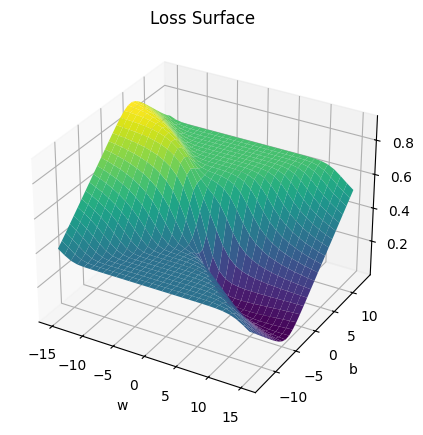

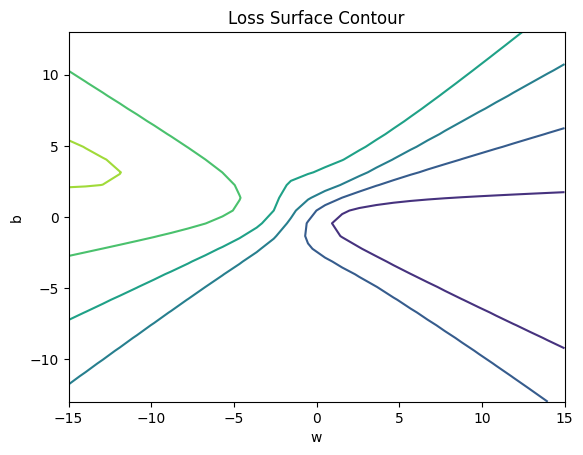

In [49]:
# Create the plot_error_surfaces object
get_surface = plot_error_surfaces(15, 13, dataset[:][0], dataset[:][1], 30)

In [50]:
# Create dataloader object, crierion function and optimizer.
trainloader = DataLoader(dataset=dataset, batch_size=3)
criterion_ms = nn.MSELoss()
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Train the Model via Batch Gradient Descent

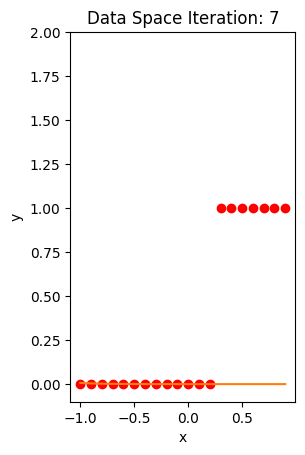

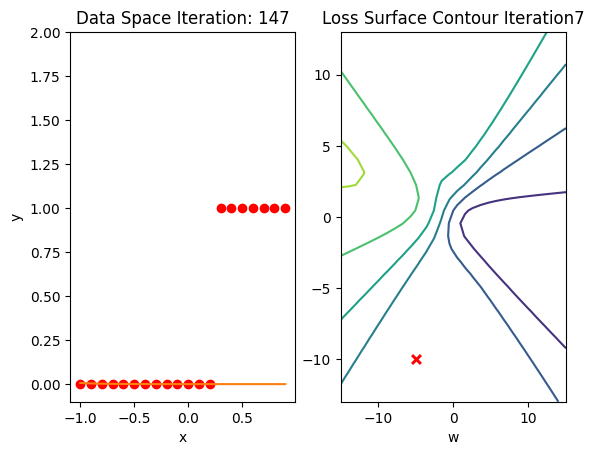

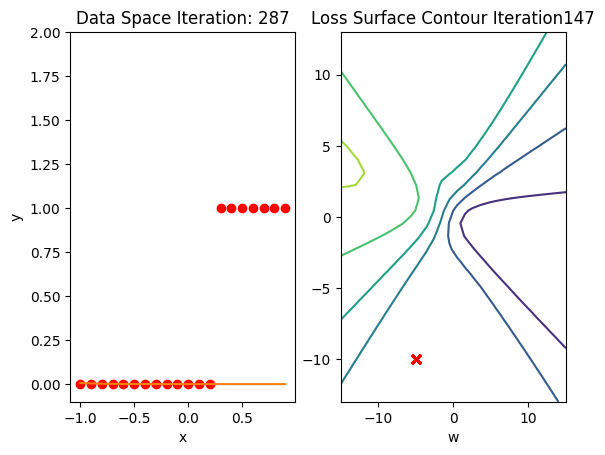

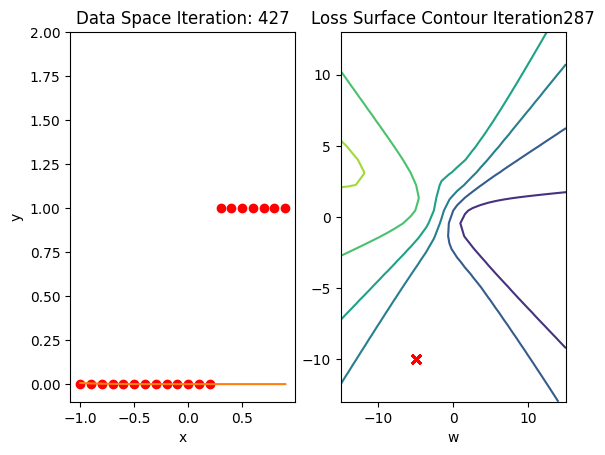

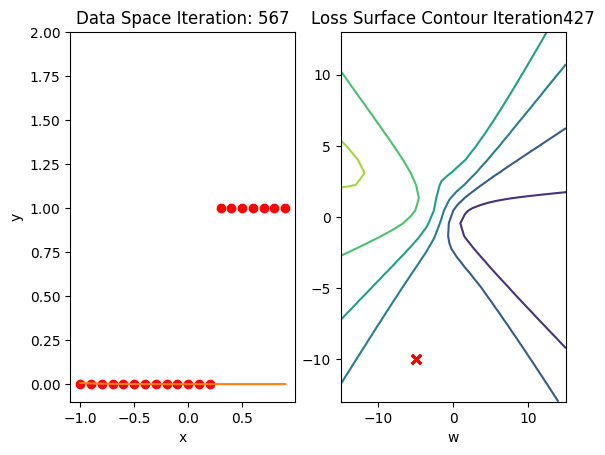

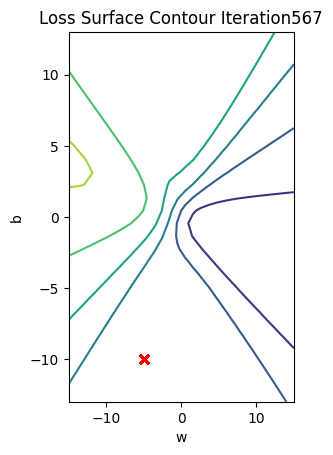

In [51]:
# Train the model
def train_model(epochs):
  for epoch in range(epochs):
    for x, y in trainloader:
      yhat = model(x)
      loss = criterion_ms(yhat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      get_surface.set_para_loss(model, loss.tolist())
    if epoch % 20 == 0:
      get_surface.plot_ps()
train_model(100)

In [54]:
# Make the Prediction
yaht = model(dataset.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == dataset.y.type(torch.ByteTensor)).type(torch.float)))

The accuracy:  tensor(0.3500)


## Logistic Regression Cross Entropy

In [55]:
# Import the libraries we need for this lab
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

In [56]:
# Create class for plotting and the function for plotting

class plot_error_surfaces(object):

    # Construstor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                yhat= 1 / (1 + np.exp(-1*(w2*self.x+b2)))
                Z[count1,count2]=-1*np.mean(self.y*np.log(yhat+1e-16) +(1-self.y)*np.log(1-yhat+1e-16))
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

     # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.plot(self.x, 1 / (1 + np.exp(-1 * (self.W[-1] * self.x + self.B[-1]))), label='sigmoid')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')

# Plot the diagram

def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg == True:
        plt.legend()
    else:
        pass

In [57]:
# Set random seed
torch.manual_seed(0)

### Get Some Data

In [58]:
# Create the data class
class Data(Dataset):

  # Constructor
  def __init__(self):
    self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
    self.y = torch.zeros(self.x.shape[0], 1)
    self.y[self.x[:, 0] > 0.2] = 1
    self.len = self.x.shape[0]

  # Getter
  def __getitem__(self, index):
    return self.x[index], self.y[index]

  # Get Length
  def __len__(self):
    return self.len

In [59]:
# Create Data object
dataset = Data()

### Create the Model and Total Loss Function

In [60]:
# Create logistic_regression class
class logistic_regression(nn.Module):

  # Constructor
  def __init__(self, n_inputs):
    super(logistic_regression, self).__init__()
    self.linear = nn.Linear(n_inputs, 1)

  # Prediction
  def forward(self, x):
    yhat = torch.sigmoid(self.linear(x))
    return yhat

In [61]:
# Create the logistic_regression result
model = logistic_regression(1)

In [63]:
# Set the weight and bias
model.state_dict()['linear.weight'].data[0] = torch.tensor([[-5]])
model.state_dict()['linear.bias'].data[0] = torch.tensor([[-10]])

<Figure size 640x480 with 0 Axes>

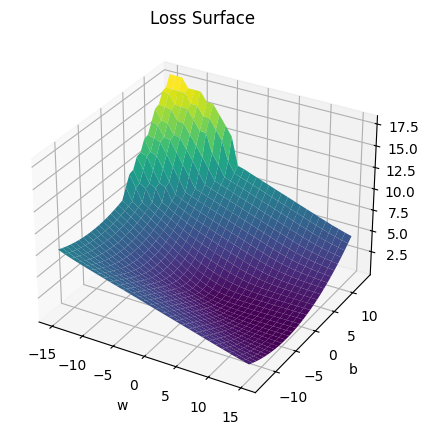

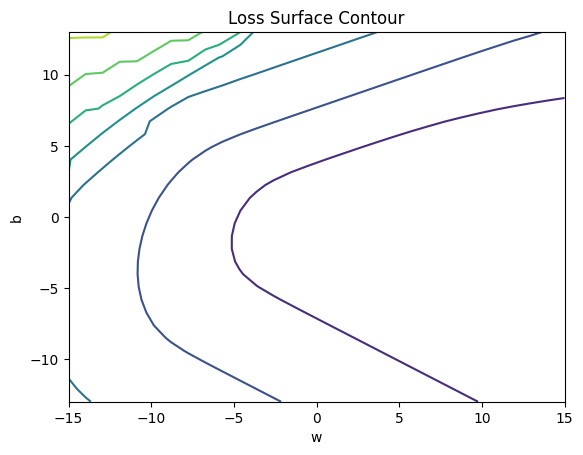

In [64]:
# Create the plot_error_surfaces object
get_surface = plot_error_surfaces(15, 13, dataset[:][0], dataset[:][1], 30)

In [66]:
# Create dataloader, criterion function and optimizer
def criterion(yhat, y):
  out = -1 * torch.mean(y * torch.log(yhat) + (1-y) * torch.log(1 - yhat))
  return out

trainloader = DataLoader(dataset=dataset, batch_size=3)
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Train the Model via Batch Gradient Descent

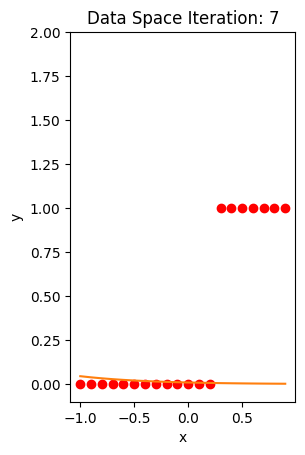

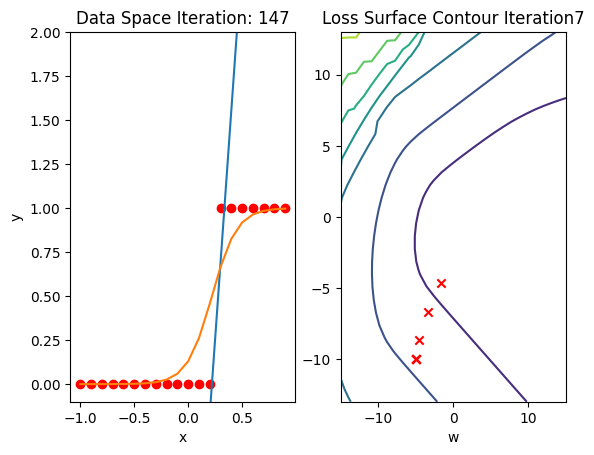

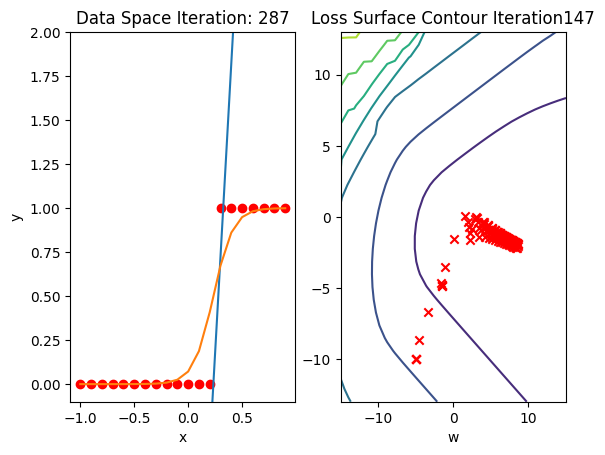

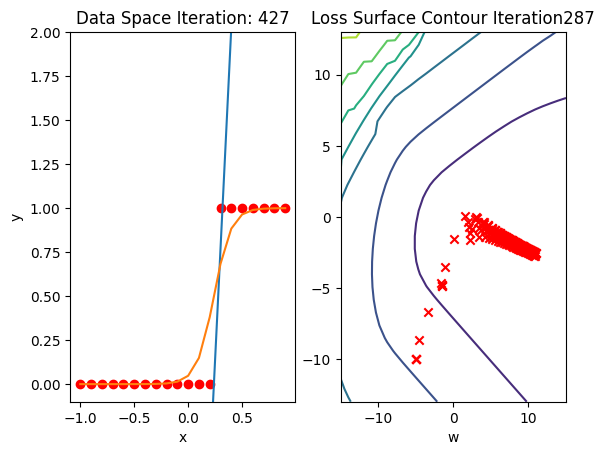

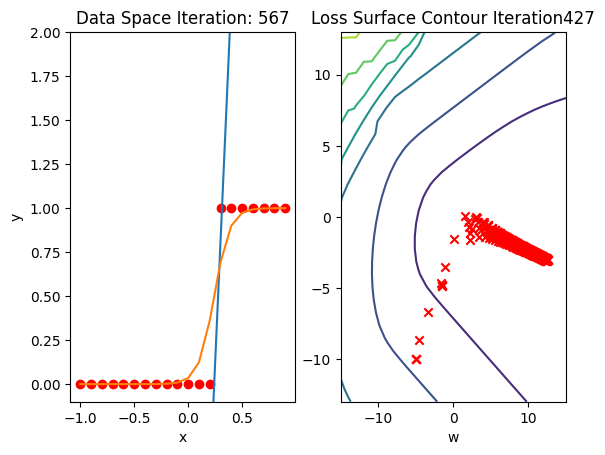

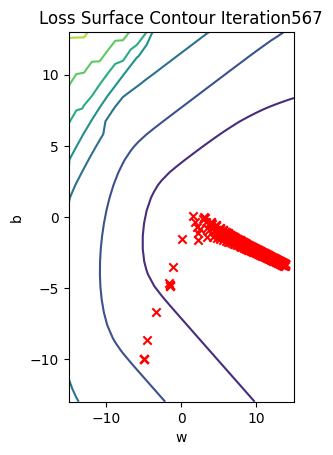

In [68]:
# Train the Model
def train_model(epochs):
  for epoch in range(epochs):
    for x, y in trainloader:
      yhat = model(x)
      loss = criterion(yhat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      get_surface.set_para_loss(model, loss.tolist())
    if epoch % 20 == 0:
      get_surface.plot_ps()

train_model(100)

In [71]:
# Make the Prediction
yhat = model(dataset.x)
label = yhat > 0.5
print("The Accuracy: ", torch.mean((label==dataset.y.type(torch.ByteTensor)).type(torch.float)))

The Accuracy:  tensor(1.)
